In [575]:
import json
import re
import StringIO
import unidecode
import pandas as pd
from mwviews.api import PageviewsClient

In [70]:
p = PageviewsClient()

In [112]:
p.article_views('en.wikipedia',
                ['Tammy Duckworth', 'Mark Kirk', 'Donald Trump', 'Hillary Clinton'],
                start='20161104', end='20161110')

defaultdict(dict,
            {datetime.datetime(2016, 11, 4, 0, 0): {'Donald_Trump': 178784,
              'Hillary_Clinton': 97560,
              'Mark_Kirk': 2238,
              'Tammy_Duckworth': 4765},
             datetime.datetime(2016, 11, 5, 0, 0): {'Donald_Trump': 158434,
              'Hillary_Clinton': 88106,
              'Mark_Kirk': 1747,
              'Tammy_Duckworth': 3619},
             datetime.datetime(2016, 11, 6, 0, 0): {'Donald_Trump': 208196,
              'Hillary_Clinton': 127707,
              'Mark_Kirk': 1679,
              'Tammy_Duckworth': 3216},
             datetime.datetime(2016, 11, 7, 0, 0): {'Donald_Trump': 281279,
              'Hillary_Clinton': 194556,
              'Mark_Kirk': 3031,
              'Tammy_Duckworth': 5450},
             datetime.datetime(2016, 11, 8, 0, 0): {'Donald_Trump': 531518,
              'Hillary_Clinton': 420278,
              'Mark_Kirk': 5645,
              'Tammy_Duckworth': 11015},
             datetime.datetime(20

In [214]:
# Copied from https://en.wikipedia.org/wiki/United_States_Senate_elections,_2016

s = '''
√ Richard Shelby (Republican)[17]
Ron Crumpton (Democratic)[18]



√ Lisa Murkowski (Republican)[19]
Ray Metcalfe (Democratic)[20]
Joe Miller (Libertarian)[21]
Margaret Stock (Independent)[22][23]
√ John McCain (Republican)[24]
Ann Kirkpatrick (Democratic)[25]
Pat Quinn (independent/Write-in)[26][27]
Gary Swing (Green/Write-in)[28]

√ John Boozman (Republican)[29]
Conner Eldridge (Democratic)[30]
Frank Gilbert (Libertarian)[31]
√ Kamala Harris (Democratic)[32]
Loretta Sanchez (Democratic)[33]


√ Michael Bennet (Democratic)[34]
Darryl Glenn (Republican)[35]
Lily Tang Williams (Libertarian)[36]
Arn Menconi (Green)[37]
√ Richard Blumenthal (Democratic)[38]
Dan Carter (Republican)[39]
Richard Lion (Libertarian)[40]
Jeff Russell (Green)[41]
√ Marco Rubio (Republican)[42]
Patrick Murphy (Democratic)[43]
Paul Stanton (Libertarian)[44]
√ Johnny Isakson (Republican)[45]
Jim Barksdale (Democratic)[46]
Allen Buckley (Libertarian)[47]
√ Brian Schatz (Democratic)[48]
John Carroll (Republican)[48]
Michael Kokoski (Libertarian)[49]
√ Mike Crapo (Republican)[50]
Jerry Sturgill (Democratic)[51]
Ray Writz (Constitution)
√ Tammy Duckworth (Democratic)[52]
Mark Kirk (Republican)[53]
Kent McMillen (Libertarian)[54]
Scott Summers (Green)[55]
√ Todd Young (Republican)[56]
Evan Bayh (Democratic)[57]
Lucy Brenton (Libertarian)[58]


√ Chuck Grassley (Republican)[59]
Patty Judge (Democratic)[60]
Chuck Aldrich (Libertarian)[61]



√ Jerry Moran (Republican)[62]
Patrick Wiesner (Democratic)[63]
Robert Garrard (Libertarian)[64]
√ Rand Paul (Republican)[65]
Jim Gray (Democratic)[66]
Foster Campbell (Democratic)[67]
John Kennedy (Republican)[68]
√ Chris Van Hollen (Democratic)[69]
Kathy Szeliga (Republican)[70]
Margaret Flowers (Green)[71]


√ Roy Blunt (Republican)[72]
Jason Kander (Democratic)[73]
Jonathan Dine (Libertarian)[74]
√ Catherine Cortez Masto (Democratic)[75]
Joe Heck (Republican)[76]
Tom Jones (Independent American)
Tony Gumina (unaffiliated)
Tom Sawyer (unaffiliated)
Jarrod Michael Williams (unaffiliated)
(None of these candidates)
√ Maggie Hassan (Democratic)[77]
Kelly Ayotte (Republican)[78]
Brian Chabot (Libertarian)[79]
√ Chuck Schumer (Democratic)[38]
Wendy Long (Republican)[80]
Alex Merced (Libertarian)[81]
Robin Wilson (Green)[82]
√ Richard Burr (Republican)[83]
Deborah Ross (Democratic)[84]
Sean Haugh (Libertarian)[85]
√ John Hoeven (Republican)[86]
Eliot Glassheim (Democratic)[87]
Robert Marquette (Libertarian)[88]
√ Rob Portman (Republican)[89]
Ted Strickland (Democratic)[90]
Joseph DeMare (Green)[91]
√ James Lankford (Republican)[38]
Mike Workman (Democratic)[92]
Robert Murphy (Libertarian)[93]
√ Ron Wyden (Democratic)[38]
Mark Callahan (Republican)[94]
Jim Lindsay (Libertarian)[95]
Eric Navickas (Green)[95]
√ Pat Toomey (Republican)[96]
Kathleen McGinty (Democratic)[97]
Edward Clifford (Libertarian)[98]
√ Tim Scott (Republican)[38]
Thomas Dixon (Democratic)[99]
Bill Bledsoe (Libertarian)[100]
√ John Thune (Republican)[101]
Jay Williams (Democratic)[102]
√ Mike Lee (Republican)[103]
Misty K. Snow (Democratic)[104]
Stoney Fonua (Independent American)
Bill Barron (unaffiliated)
√ Patrick Leahy (Democratic)[105]
Scott Milne (Republican)[106]
Pete Diamondstone (Liberty Union)
Cris Ericson (Marijuana)[verification needed]
Jerry Trudell (unaffiliated)


√ Patty Murray (Democratic)[107]
Chris Vance (Republican)[108]


√ Ron Johnson (Republican)[109]
Russ Feingold (Democratic)[110]
Phil Anderson (Libertarian)[111]
'''

In [273]:
candidates_df = pd.read_table(StringIO.StringIO(s), header = None, names = ['candidate'])
candidates_df['candidate'] = candidates_df['candidate'].apply(lambda x: unidecode.unidecode(x.decode('utf-8')))

candidates_df = candidates_df['candidate'].str.split('\(', expand=True)
candidates_df.columns = ['name', 'party']

candidates_df = candidates_df.applymap(lambda x: re.sub('[^a-zA-Z\s\.]', '', x).strip())


candidates_df_clean = candidates_df[(candidates_df['party'].str.contains('Republican') | 
                       candidates_df['party'].str.contains('Democratic') |
                                    candidates_df['party'].str.contains('Libertarian'))]


candidates_df_clean.head()

,name,party
0,Richard Shelby,Republican
1,Ron Crumpton,Democratic
2,Lisa Murkowski,Republican
3,Ray Metcalfe,Democratic
4,Joe Miller,Libertarian


In [474]:
candidates_list = candidates_df_clean['name'].tolist()
candidates_list += ['Donald Trump', 'Hillary Clinton', 'Gary Johnson']

In [475]:
candidates_json = p.article_views('en.wikipedia',
                candidates_list,
                start='20161101', end='20161115')

In [476]:
combined = pd.DataFrame()

for k, val in candidates_json.viewitems():
    q = pd.Series(val)
    
    if len(q) != 0:
        q.name = str(k.date())
        combined = pd.concat([combined, q], axis = 1)

combined = combined.reset_index()
combined.rename(columns = {'index':'candidate_name'}, inplace = True)
combined = combined.dropna(axis = 0)

In [480]:
combined.head()

,candidate_name,2016-11-06,2016-11-13,2016-11-02,2016-11-09,2016-11-14,2016-11-07,2016-11-10,2016-11-03,2016-11-15,2016-11-04,2016-11-11,2016-11-12,2016-11-05,2016-11-08,2016-11-01
0,Alex_Merced,78.0,9.0,239.0,96.0,15.0,207.0,28.0,91.0,18.0,85.0,60.0,12.0,57.0,516.0,35.0
1,Allen_Buckley,170.0,19.0,501.0,139.0,22.0,532.0,51.0,457.0,26.0,444.0,21.0,23.0,172.0,1502.0,370.0
2,Ann_Kirkpatrick,543.0,432.0,802.0,1377.0,848.0,879.0,644.0,728.0,375.0,620.0,480.0,423.0,524.0,1887.0,826.0
5,Brian_Schatz,345.0,569.0,405.0,1566.0,623.0,470.0,1259.0,357.0,626.0,354.0,872.0,646.0,374.0,833.0,319.0
6,Catherine_Cortez_Masto,1034.0,3028.0,883.0,16565.0,3006.0,1595.0,9692.0,998.0,2585.0,869.0,6095.0,3680.0,1004.0,2012.0,739.0


In [552]:
candidate_data_long = pd.melt(combined, id_vars=['candidate_name'], var_name='date', value_name='view_count')
candidate_data_long.head()

,candidate_name,date,view_count
0,Alex_Merced,2016-11-06,78.0
1,Allen_Buckley,2016-11-06,170.0
2,Ann_Kirkpatrick,2016-11-06,543.0
3,Brian_Schatz,2016-11-06,345.0
4,Catherine_Cortez_Masto,2016-11-06,1034.0


In [553]:
# set up as a time series panel
candidate_data_long = candidate_data_long.set_index(pd.DatetimeIndex(candidate_data_long['date']))
candidate_data_long.sort_index(inplace = True)

In [555]:
# normalized view count
first_values = (candidate_data_long.groupby(['candidate_name']).transform('first'))
candidate_data_long['normalized_view_count'] = candidate_data_long['view_count'] / first_values['view_count']
candidate_data_long.head()

,candidate_name,date,view_count,normalized_view_count
2016-11-01,Wendy_Long,2016-11-01,770.0,1.0
2016-11-01,Hillary_Clinton,2016-11-01,76871.0,1.0
2016-11-01,James_Lankford,2016-11-01,617.0,1.0
2016-11-01,Jason_Kander,2016-11-01,2186.0,1.0
2016-11-01,Jay_Williams,2016-11-01,16.0,1.0


In [557]:
candidate_data_long.to_csv('/users/nickbecker/Downloads/candidate_data_long_normalized.csv', index = False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [558]:
politicians_list = ['Donald_Trump', 'Hillary_Clinton', 'Tammy_Duckworth', 'Mark_Kirk']
presidential_data = candidate_data_long[candidate_data_long['candidate_name'].isin(politicians_list)]

In [559]:
presidential_data.head()

,candidate_name,date,view_count,normalized_view_count
2016-11-01,Hillary_Clinton,2016-11-01,76871.0,1.000000
2016-11-01,Donald_Trump,2016-11-01,128660.0,1.000000
2016-11-01,Tammy_Duckworth,2016-11-01,3410.0,1.000000
2016-11-01,Mark_Kirk,2016-11-01,1654.0,1.000000
2016-11-02,Hillary_Clinton,2016-11-02,84640.0,1.101065


candidate_name
Donald_Trump       Axes(0.125,0.125;0.775x0.775)
Hillary_Clinton    Axes(0.125,0.125;0.775x0.775)
Mark_Kirk          Axes(0.125,0.125;0.775x0.775)
Tammy_Duckworth    Axes(0.125,0.125;0.775x0.775)
dtype: object

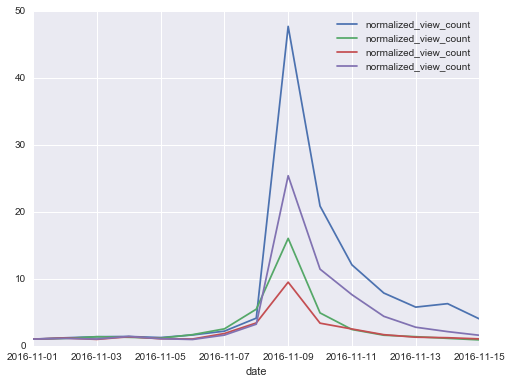

In [574]:
fig, ax = plt.subplots(figsize=(8,6))

presidential_data.groupby('candidate_name').plot('date', 'normalized_view_count', ax = ax)

In [565]:
presidential_data.query("candidate_name == 'Tammy_Duckworth'")

,candidate_name,date,view_count,normalized_view_count
2016-11-01,Tammy_Duckworth,2016-11-01,3410.0,1.000000
2016-11-02,Tammy_Duckworth,2016-11-02,3774.0,1.106745
2016-11-03,Tammy_Duckworth,2016-11-03,3447.0,1.010850
2016-11-04,Tammy_Duckworth,2016-11-04,4765.0,1.397361
2016-11-05,Tammy_Duckworth,2016-11-05,3619.0,1.061290
2016-11-06,Tammy_Duckworth,2016-11-06,3216.0,0.943109
2016-11-07,Tammy_Duckworth,2016-11-07,5450.0,1.598240
2016-11-08,Tammy_Duckworth,2016-11-08,11015.0,3.230205
2016-11-09,Tammy_Duckworth,2016-11-09,86615.0,25.400293
2016-11-10,Tammy_Duckworth,2016-11-10,39032.0,11.446334
